#**이걸 보고 이런식으로 처음부터 하면된다. 기초 틀 정리**
## 📌데이터 받아오기 (diabetes.csv 기준 + combined_dataset.xlsx 기준 )
#### 지금 코드 흐름:
##### 1. 데이터 로딩 : CSV 파일을 불러와 데이터프레임 생성
##### 2. 결측치 확인 및 처리 : 데이터에 누락된 값이 있는지 확인
##### 3. 이상치 처리 (IQR 방식) : IQR 방식으로 이상치를 중앙값으로 대체
##### 4. 레이블 확인 (df['Outcome'].value_counts()) : Outcome 값이 얼마나 분포되어 있는지 확인 (imbalanced data 체크) 레이블 값은 다를 수 있음 ex) label,outcome 
##### 5. 데이터 분리 (X, y 나누기) : X(입력값)과 y(레이블)로 나누고, 훈련/테스트 데이터로 분리
##### 6. 데이터 스케일링 (StandardScaler 적용) : StandardScaler()를 사용해 입력 데이터를 표준화
##### 7. 모델 학습 및 평가 : 모델을 학습시키고 정확도, 혼동 행렬을 출력

In [124]:
# 여긴 데이터 로딩 
import pandas as pd  # pandas : 데이터 분석을 위한 라이브러리, ex) pd.read_csv(), df['col'], df.drop() 데이터 변환 가능
import numpy as np # numpy: 고성능 수치 계산을 위한 라이브러리입니다. 주로 배열(array)을 처리할 때 사용됩니다. 벡터화된 연산을 통해 빠르게 수치 데이터를 다룰 수 있습니다.
import seaborn as sns # seaborn: 데이터 시각화를 위한 라이브러리입니다. matplotlib의 기능을 확장하여 더 쉽게 통계적 시각화를 할 수 있습니다. ex) sns.scatterplot(), sns.barplot()
import matplotlib.pyplot as plt # matplotlib: 그래프와 플롯을 그리기 위한 가장 기본적인 라이브러리입니다. pyplot 모듈을 통해 선 그래프, 막대 그래프, 히스토그램 등을 그릴 수 있습니다.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#train_test_split: 데이터셋을 훈련 데이터와 테스트 데이터로 나누는 함수입니다. 모델 훈련 시 교차 검증을 할 때 유용하게 사용됩니다.
#StandardScaler: 특징 스케일링(표준화)을 위한 도구입니다. 모델링 전, 특성 값들이 다른 범위에 있을 때 이를 표준화하여 모델 학습의 성능을 개선할 수 있습니다
#LabelEncoder: 범주형 레이블(문자 등)을 숫자 형태로 변환할 때 써요.
#RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier, SVC: 각각 랜덤 포레스트, 결정 트리, 로지스틱 회귀, K-최근접 이웃, 서포트 벡터 머신 모델을 만들기 위한 클래스예요.
#accuracy_score: 모델의 정확도를 계산하는 데 사용해요.
#confusion_matrix: 모델의 혼동 행렬을 계산하는 함수입니다. 분류 문제에서 진짜 양성, 진짜 음성, 가짜 양성, 가짜 음성을 구체적으로 보여줍니다.

## 📌 데이터 로딩 역할 !!

##### df = pd.read_csv("여긴 내 파일이 있는 주소를 적어주면 됨/diabetes.csv").copy()
##### diabetes.csv 파일을 읽어서 df에 저장.
##### .copy()를 사용해서 원본 데이터프레임을 보호 (불필요한 경고 방지). copy는 보통 안썻음.

##### 보통 copy는 원본 데이터 변경을 피하고 싶을때 사용. 그니까 데이터를 수정할 때 원본 데이터프레임을 변경하지 않도록 보장하고 싶을 때 쓰는 방식
##### ex) df = pd.read_csv("titanic.csv").copy() -> 데이터를 깊은 복사해서 df에 저장하는 코드 원본 데이터의 안전성 보장! 

#### (1). url을 그대로 가져오는 방식 

In [92]:
# (1). url을 그대로 가져오는 방식 
import pandas as pd

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"
df1= pd.read_csv(url)
print(df1.head())

# 근데 이 방식으로 url 가져올때 오류 발생으로 인해 gpt 도움으로 raw 방식으로 url을 사용해서 가져옴 
# 원인은 : 잘못된 URL 사용
#https://github.com/... 형식의 URL은 HTML 페이지를 반환하므로, Pandas가 CSV로 읽지 못합니다.
#CSV 원본 파일을 직접 다운로드할 수 있는 raw URL을 사용해야 합니다. 
# 위와 같은 이유로 raw 방식을 사용해야함.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### (2). 내 컴퓨터에 csv 저장한거 가져오는 방식 !! 

In [94]:
# (2). 내 컴퓨터에 csv 저장한거 가져오는 방식 !! 
import pandas as pd
file_path = "C:/Users/min22/Desktop/Artifical intelligence/diabetes.csv"

df2 = pd.read_csv(file_path)
print(df2.head())
# 여기서 주의 해야할점은 내 폴더 안에 csv 파일 들어가있는거 주소 복사해서 넣을때 그대로 넣으면 오류뜨니까 /로 바꿔줘야함 !! 


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### (3). 내 컴퓨터에서 xlsx 파일 가져오는 방식!! 

In [96]:
# (3). 내 컴퓨터에서 xlsx 파일 가져오는 방식!! 
import pandas as pd

# 파일 경로 
file_path = "C:/Users/min22/Desktop/Artifical intelligence/combined_dataset-1.xlsx"

# 엑셀 파일 불러오기
df3 = pd.read_excel(file_path)

# 데이터 확인
print(df3.head())

   Num.  subject_ID Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0     1           2   Female         45         152          63   
1     1           2   Female         45         152          63   
2     1           2   Female         45         152          63   
3     2           3   Female         50         157          50   
4     2           3   Female         50         157          50   

   Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
0                            161                              89   
1                            161                              89   
2                            161                              89   
3                            160                              93   
4                            160                              93   

   Heart Rate(b/m)  BMI(kg/m^2)  ...  2091  2092  2093  2094  2095  2096  \
0               97    27.268006  ...  1766  1766  1766  1833  1833  1827   
1               97    27.268006  ...

#### (4). url주소로 xlsx파일을 가져오는 방식!! 

In [99]:
# (4). url주소로 xlsx파일을 가져오는 방식!! 
import pandas as pd 

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/combined_dataset-1.xlsx"
df4 = pd.read_excel(url) # csv일땐 excel이 csv가 되어야함!!
print(df4.head())

   Num.  subject_ID Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0     1           2   Female         45         152          63   
1     1           2   Female         45         152          63   
2     1           2   Female         45         152          63   
3     2           3   Female         50         157          50   
4     2           3   Female         50         157          50   

   Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
0                            161                              89   
1                            161                              89   
2                            161                              89   
3                            160                              93   
4                            160                              93   

   Heart Rate(b/m)  BMI(kg/m^2)  ...  2091  2092  2093  2094  2095  2096  \
0               97    27.268006  ...  1766  1766  1766  1833  1833  1827   
1               97    27.268006  ...

### 2. 📌 기본 정보 확인!

In [102]:
#### 기본 정보 확인 diabetes.csv
print(df1.info())

#### 컬럼별 결측치 확인 diabetes
df1.isnull().sum()


#### 기술 통계량 확인 diabetes 
print(df1.describe())

## 컬럼명 확인
df1.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### 3. 데이터 전처리(결측치)  

##### 📌 결측치 확인(누락된 값을 확인!!) 
##### print("결측치 개수:")
##### print(df.isnull().sum())
##### df.isnull().sum(): 데이터프레임에서 결측치(누락된 값) 개수를 확인.
##### Diabetes 데이터셋에는 결측치가 없지만, 일반적으로 확인하는 과정이 필요. 그래서 titanic에선 확인을 진행하였음 
###### 분석의 정확성 향상을 위해 사용 + 데이터의 질을 개선 

In [105]:
# 결측치 제거 (Age는 평균 나이로 대체)
# 2. 결측치 확인
df1.isnull().sum()
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [106]:
#### 결측치 제거(기본)  
# df = df.dropna()
# df.isnull().sum()

### 4. 이상치 처리(IQR방식 사용) 

##### IQR(Interquartile Range)을 사용하여 이상치를 감지하고, 이상치 값을 중앙값(median)으로 대체.
##### np.where()를 사용해서 이상치가 하한/상한 범위를 벗어나면 중앙값으로 변경.
##### 📌 이상치 처리 대상 컬럼:
##### Glucose (혈당), BloodPressure (혈압), SkinThickness (피부 두께), Insulin (인슐린), BMI (체질량지수)

In [152]:
# 4. 이상치 처리 (IQR 방법)
# IQR: 사분위수 범위를 이용해 이상치를 탐지하고 제거
# 이상치는 데이터의 분포에서 극단적으로 크거나 작은 값을 의미하며, 모델의 학습에 부정적인 영향을 줄 수 있기 때문에 제거하거나 조정함
def remove_outliers(df1, column):
    Q1 = df1[column].quantile(0.25)  # 1사분위수 (Q1)
    Q3 = df1[column].quantile(0.75)  # 3사분위수 (Q3)
    IQR = Q3 - Q1  # 사분위 범위 (IQR)
    lower_bound = Q1 - 1.5 * IQR  # 이상치 하한
    upper_bound = Q3 + 1.5 * IQR  # 이상치 상한
    df1[column] = np.where((df1[column] < lower_bound) | (df1[column] > upper_bound), df1[column].median(), df1[column])  

In [154]:

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    remove_outliers(df1, col)
#위 컬럼들을 remove_outliers() 함수에 적용하여 이상치 제거. 

### 5. 레이블 확인 (imbalanced data 여부 체크)
##### 📌  Outcome 컬럼이 0(비당뇨)와 1(당뇨)로 얼마나 분포되어 있는지 확인.
##### 데이터가 너무 불균형하면(한쪽 클래스가 너무 많으면) 모델 학습이 편향될 수 있음.

In [157]:
print("클래스 분포:")
print(df1['Outcome'].value_counts()) # 0(비당뇨) 가 500개, 1(당뇨)이 268개로 약간의 불균형이 있음.

클래스 분포:
Outcome
0    500
1    268
Name: count, dtype: int64


##### 📌 Name은 이 시리즈 객체가 Outcome이라는 열에서 나온 값들임을 나타냄
##### dtype은 int64타입이고 
##### count는 이 출력 결과를 의미하는 것이 아니라 "Name" 뒤에 있는 Outcome 열이 가지고 있는 레벨(범주) 에 대한 설명 

### 6. 데이터 분리 (X,y) 나누기
##### 데이터를 나누는 이유는 훈련(train) 데이터로 모델을 학습시키고, 테스트(TEST) 데이터로 모델을 평가하여 과적합을 방지하고 일반화 성능을 높이기 위해서! 
##### 여기서 X는 모델의 입력 데이터(특성들), y는 목표 값(타겟 변수) 입니다. 


##### 📌train_test_split() 함수는 주어진 데이터를 훈련 데이터와 테스트 데이터로 나누는 함수! -> sklearn.model_selection 라이브러리가 제공!! 
##### X: 특성(입력 데이터). 예를 들어, 주택 가격 예측 문제라면 X는 집의 면적, 층수, 방 개수와 같은 정보들이 포함된 데이터입니다.
##### y: 타겟(목표 값). 예를 들어, 주택 가격 예측 문제라면 y는 각 집의 가격입니다.
##### test_size = 0.2 이면 20% 를 테스트 데이터로 사용하고 나머지 80%는 훈련 데이터로 사용하겠다는 뜻! 예를 들면 1000개 기준이면 200개는 테스트, 800개는 훈련 이런 느낌 ! 
##### random_state =42 는 랜덤 시드 값을 설정하는건데, 이 값을 설정하면 동일한 데이터를 나누더라도 항상 같은 결과를 얻을 수 있다. 숫자는 아무거나 설정해도 괜찮다. 오로지 데이터 분할을 일관성 있게 만들기 위한 값. 
##### 즉, random_state 값이 존재하지 않으면 train_data값이 항상 다르게 나온다. 

In [176]:
X = df1.drop(columns=['Outcome'])  # 독립변수 (입력값)
y = df1['Outcome']  # 종속변수 (레이블)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7. 데이터 스케일링(표준화) 
##### StandardScaler(): 평균 0, 표준편차 1로 데이터를 변환하여 모델 학습 속도를 높이고 성능을 향상.
##### 훈련 데이터(X_train)에 fit_transform() 적용.
##### 테스트 데이터(X_test)는 transform()만 적용.

#### 표준화는 데이터의 평균을 0, 표준편차를 1로 맞추는 방법이다. 하지만, 0을 중심으로 퍼지게 되며 값의 범위는 고정되지 않는다.
##### 정규화는 표준화와는 다르게 데이터의 범위를 0과 1사이로 맞추는 방법!!! 
#### 밑에 처럼 표준화가 진행되면 범위가 저렇게 맞춰짐.
#### 중요한 점은, 특성들이 서로 다른 범위르 가질 때 스케일을 맞추어 머신러닝 알고리즘이 각 특성을 동등하게 다룰수 있게 해준다는 것! 

In [182]:
#from sklearn.preprocessing import StandardScaler
##scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# X_scaled: [[-1.41421356, -1.41421356],
#            [-0.70710678, -0.70710678],
#            [ 0.        ,  0.        ],
#            [ 0.70710678,  0.70710678],
#            [ 1.41421356,  1.41421356]]

In [184]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 8. 모델 리스트 생성
#### 사용할 5가지 분류 모델을 딕셔너리에 저장:
##### Random Forest: 랜덤한 여러 개의 결정트리를 조합한 모델 (성능 좋음)
##### Decision Tree: 데이터를 분할하여 예측하는 트리 구조 모델
##### Logistic Regression: 확률 기반 선형 분류 모델
##### KNN: 데이터와 가장 가까운 이웃을 찾는 거리 기반 모델
##### SVM: 초평면을 찾아 데이터를 나누는 모델

In [187]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

### 9. 모델 학습 및 평가
##### 혼동행렬을 사용하는 이유 : 모델의 성능을 평가하고, 예측 결과가 얼마나 정확한지 파악하기 위해서!
##### model.fit(X_train, y_train): 모델 학습
##### model.predict(X_test): 학습된 모델로 예측 수행
##### confusion_matrix(y_test, y_pred): 예측과 실제값 비교를 위한 혼동 행렬 생성
##### accuracy_score(y_test, y_pred): 모델 정확도 계산


In [190]:
for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 테스트 데이터 예측


In [191]:
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)


In [194]:
    print(f"{name} 정확도: {acc:.4f}")
    print(f"{name} 혼동 행렬:\n{cm}\n")

SVM 정확도: 0.7468
SVM 혼동 행렬:
[[82 17]
 [22 33]]



### 10. 혼동 행렬 시각화
##### sns.heatmap(): 혼동 행렬을 시각적으로 표현.
##### annot=True: 숫자 표시.
##### fmt='d': 정수 형식으로 출력.
##### cmap='Greens': 초록색 계열 색상 사용.

#### 혼동 행렬 시각화 해석!
##### 행 (predicted): 모델이 예측한 값 (0과 1)
##### 열 (Actual): 실제 값 (0과 1)
###### True Negative (TN): 실제 0인데, 모델이 0으로 예측한 경우
###### 값: 82
###### 의미: 모델이 실제로 0인 82개의 데이터를 정확히 0으로 예측했습니다.
###### False Positive (FP): 실제 0인데, 모델이 1로 잘못 예측한 경우
###### 값: 17
###### 의미: 모델이 실제로 0인 17개의 데이터를 잘못 1로 예측했습니다.
###### False Negative (FN): 실제 1인데, 모델이 0으로 잘못 예측한 경우
###### 값: 22
###### 의미: 모델이 실제로 1인 22개의 데이터를 잘못 0으로 예측했습니다.
###### True Positive (TP): 실제 1인데, 모델이 1로 정확히 예측한 경우
###### 값: 33
###### 의미: 모델이 실제로 1인 33개의 데이터를 정확히 1로 예측했습니다.

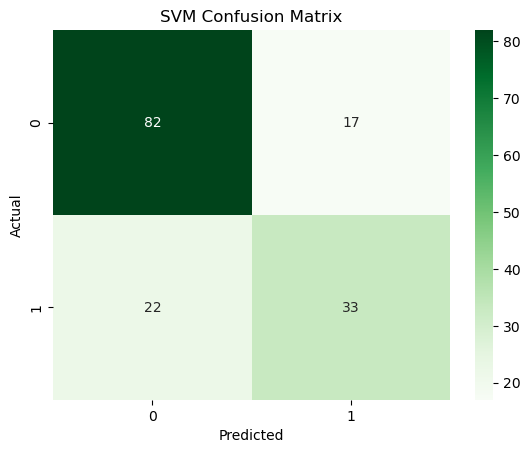

In [197]:
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
